In [1]:
import os, shutil

In [4]:
dogs = os.listdir('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/train/dogs')
cats = os.listdir('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/train/cats')

In [6]:
len(dogs)

500

In [7]:
dogs = os.listdir('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/test/dogs')
cats = os.listdir('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/test/cats')

In [8]:
len(dogs)

500

In [9]:
len(cats)

500

In [10]:
from tensorflow.keras.preprocessing import image

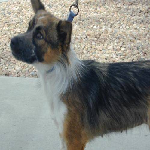

In [15]:
img_path = '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/train/dogs/dog.3.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img

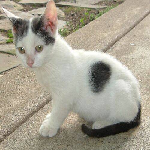

In [16]:
img_path = '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/train/cats/cat.3.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary cls
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# 이미지 데이터를 변형하는 객체를 생성 = > image shape을 동일하게 맞춘다

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# 이미지 불러오는 객체 생성

In [27]:
train_dir = "/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/train"

train_data_pull = train_datagen.flow_from_directory(
  train_dir,   # dogs, cats
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary'
)

Found 1500 images belonging to 2 classes.


In [28]:
test_dir = "/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/test"

test_data_pull = test_datagen.flow_from_directory(
  test_dir,   # dogs, cats
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [29]:
hist = model.fit(train_data_pull, epochs=10, validation_data=test_data_pull)

Epoch 1/10
75/75 [==============================] - 754s 10s/step - loss: 0.6762 - accuracy: 0.6707 - val_loss: 0.7247 - val_accuracy: 0.5410
Epoch 2/10
75/75 [==============================] - 11s 149ms/step - loss: 0.6248 - accuracy: 0.6873 - val_loss: 0.6460 - val_accuracy: 0.6270
Epoch 3/10
75/75 [==============================] - 11s 144ms/step - loss: 0.5943 - accuracy: 0.7060 - val_loss: 0.6683 - val_accuracy: 0.6180
Epoch 4/10
75/75 [==============================] - 11s 151ms/step - loss: 0.5130 - accuracy: 0.7527 - val_loss: 0.6843 - val_accuracy: 0.6620
Epoch 5/10
75/75 [==============================] - 12s 166ms/step - loss: 0.4530 - accuracy: 0.7900 - val_loss: 0.7448 - val_accuracy: 0.6380
Epoch 6/10
75/75 [==============================] - 11s 150ms/step - loss: 0.3885 - accuracy: 0.8193 - val_loss: 0.6139 - val_accuracy: 0.6980
Epoch 7/10
75/75 [==============================] - 11s 148ms/step - loss: 0.3159 - accuracy: 0.8587 - val_loss: 0.7831 - val_accuracy: 0.6730


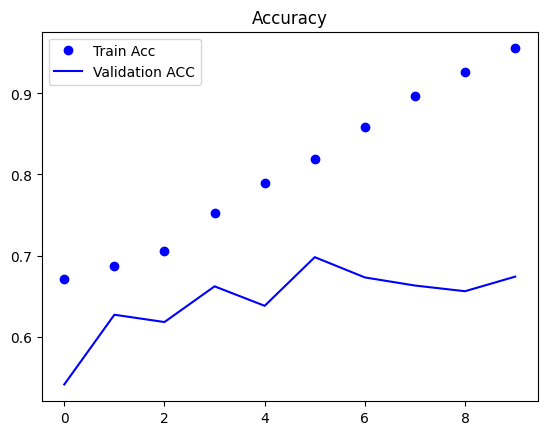

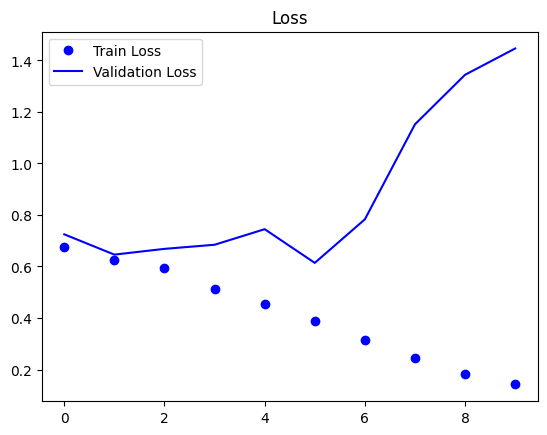

In [30]:
import matplotlib.pyplot as plt

acc = hist.history['accuracy']  # train acc
val_acc = hist.history['val_accuracy']  # val acc
loss = hist.history['loss']  # train loss
val_loss = hist.history['val_loss']  # val loss

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label = 'Train Acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation ACC')
plt.title('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label= 'Train Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Loss')
plt.legend()

In [ ]:
# data augmentation
# 데이터를 증폭시키는 기법
# 데이터를 변형시는 기법

# => 데이터가 적은 경우, 기존의 데이터를 다양하게 변형시키면서 데이터를 증폭시켜서 학습시킬 수 있다..
# => 데이터의 변형 및 증폭은 train data에만 적용, 모델을 test하는 경우 test data를 그대로 사용해야 한다..

In [38]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40, # 40도 이내에서 random하게 이미지를 회전시킨다
    width_shift_range=0.2, # 20% 이내에서 이미지를 좌우 이동
    height_shift_range=0.2,
    shear_range = 0.2,  # 20% 이내에서 이미지를 기울인다
    zoom_range=0.2, # 20% 이내에서 이미지를 확대 축소
    horizontal_flip=True,  # 이미지를 좌우 반전
    vertical_flip=True) # 이미지를 상하 반전

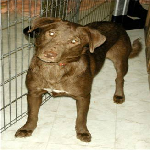

In [33]:
img = image.load_img("/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/catsanddogs0/train/dogs/dog.1.jpg", target_size=(150, 150))
img

In [36]:
from tensorflow.keras.preprocessing import image
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 150, 150, 3)

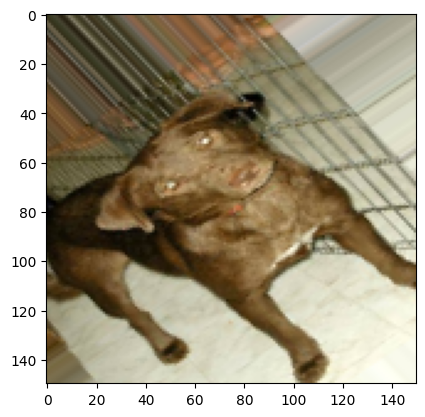

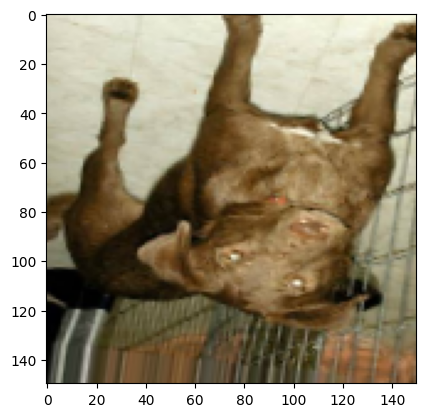

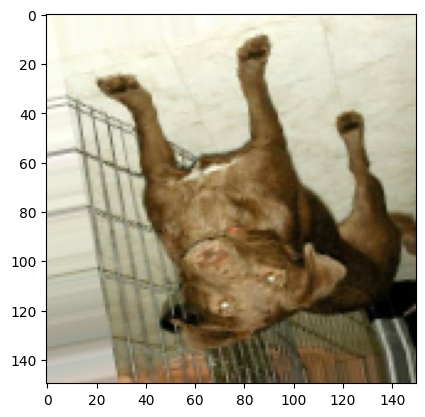

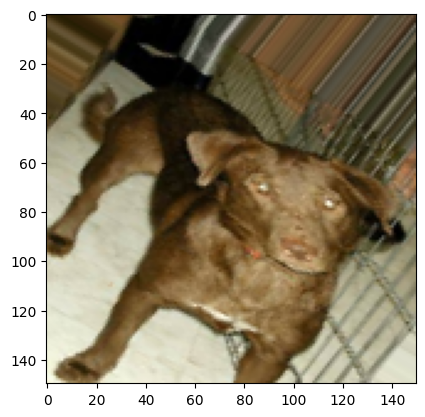

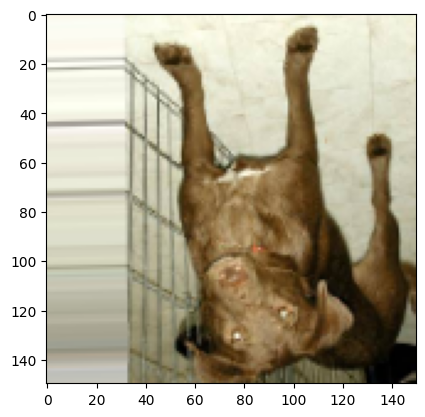

In [39]:
from re import I

i = 0
for batch in train_datagen.flow(x, batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))

  i += 1
  if i%5 == 0:
    break
plt.show()


In [40]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [41]:
train_data_pull = train_datagen.flow_from_directory(
  train_dir,   # dogs, cats
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary'
)

Found 1500 images belonging to 2 classes.


In [42]:
test_data_pull = test_datagen.flow_from_directory(
  test_dir,   # dogs, cats
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [43]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # binary cls
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [45]:
hist = model.fit(train_data_pull, epochs=10, validation_data=test_data_pull)

Epoch 1/10
75/75 [==============================] - 21s 250ms/step - loss: 0.6695 - accuracy: 0.6627 - val_loss: 0.8069 - val_accuracy: 0.5000
Epoch 2/10
75/75 [==============================] - 19s 259ms/step - loss: 0.6408 - accuracy: 0.6673 - val_loss: 0.7560 - val_accuracy: 0.5000
Epoch 3/10
75/75 [==============================] - 19s 251ms/step - loss: 0.6419 - accuracy: 0.6667 - val_loss: 0.7155 - val_accuracy: 0.5000
Epoch 4/10
75/75 [==============================] - 19s 260ms/step - loss: 0.6332 - accuracy: 0.6667 - val_loss: 0.7036 - val_accuracy: 0.5080
Epoch 5/10
75/75 [==============================] - 19s 252ms/step - loss: 0.6298 - accuracy: 0.6720 - val_loss: 0.7418 - val_accuracy: 0.5000
Epoch 6/10
75/75 [==============================] - 21s 276ms/step - loss: 0.6219 - accuracy: 0.6767 - val_loss: 0.6702 - val_accuracy: 0.5460
Epoch 7/10
75/75 [==============================] - 19s 247ms/step - loss: 0.6263 - accuracy: 0.6733 - val_loss: 0.7441 - val_accuracy: 0.5000

In [ ]:
# 모델을 더 복잡하게 구성..

In [88]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40, # 40도 이내에서 random하게 이미지를 회전시킨다
    width_shift_range=0.2, # 20% 이내에서 이미지를 좌우 이동
    height_shift_range=0.2,
    shear_range = 0.2,  # 20% 이내에서 이미지를 기울인다
    zoom_range=0.2, # 20% 이내에서 이미지를 확대 축소
    horizontal_flip=True,  # 이미지를 좌우 반전
    vertical_flip=True) # 이미지를 상하 반전

In [89]:
train_data_pull = train_datagen.flow_from_directory(
  train_dir,   # dogs, cats
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary'
)

Found 1500 images belonging to 2 classes.


In [90]:
test_data_pull = test_datagen.flow_from_directory(
  test_dir,   # dogs, cats
  target_size=(150, 150),
  batch_size=20,
  class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [91]:
model = Sequential()
model.add(Conv2D(120, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(Conv2D(120, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(240, (3, 3), activation='relu'))
model.add(Conv2D(240, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(360, (3, 3), activation='relu'))
model.add(Conv2D(360, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))  # binary cls
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 148, 148, 120)     3360      
                                                                 
 conv2d_58 (Conv2D)          (None, 146, 146, 120)     129720    
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 73, 73, 120)       0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 71, 71, 240)       259440    
                                                                 
 conv2d_60 (Conv2D)          (None, 69, 69, 240)       518640    
                                                                 
 max_pooling2d_34 (MaxPooli  (None, 34, 34, 240)       0         
 ng2D)                                               

In [92]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(train_data_pull, epochs=10, validation_data=test_data_pull, steps_per_epoch=25, validation_steps=25)

Epoch 1/10
25/25 [==============================] - 13s 390ms/step - loss: 0.6911 - accuracy: 0.6500 - val_loss: 0.7191 - val_accuracy: 0.4980
Epoch 2/10
25/25 [==============================] - 8s 335ms/step - loss: 0.6269 - accuracy: 0.6880 - val_loss: 0.9517 - val_accuracy: 0.5000
Epoch 3/10
25/25 [==============================] - 9s 363ms/step - loss: 0.6475 - accuracy: 0.6680 - val_loss: 0.7362 - val_accuracy: 0.5000
Epoch 4/10
25/25 [==============================] - 9s 375ms/step - loss: 0.6519 - accuracy: 0.6460 - val_loss: 0.7383 - val_accuracy: 0.4900
Epoch 5/10
25/25 [==============================] - ETA: 0s - loss: 0.6315 - accuracy: 0.6840

In [56]:
# transfer learning

In [57]:
from tensorflow.keras.applications import EfficientNetB0

In [58]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(150,150,3))

16705208/16705208 [==============================] - 0s 0us/step


In [59]:
base_model.trainable = False

In [63]:
transfer_model = Sequential()
transfer_model.add(base_model)
transfer_model.add(Flatten())
transfer_model.add(Dense(512, activation='relu'))
transfer_model.add(Dense(256, activation='relu'))
transfer_model.add(Dense(128, activation='relu'))
transfer_model.add(Dense(60, activation='relu'))
transfer_model.add(Dense(30, activation='relu'))
transfer_model.add(Dense(10, activation='relu'))
transfer_model.add(Dense(2, activation='softmax'))  # binary cls
transfer_model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 5, 5, 1280)        4049571   
 )                                                               
                                                                 
 flatten_6 (Flatten)         (None, 32000)             0         
                                                                 
 dense_33 (Dense)            (None, 512)               16384512  
                                                                 
 dense_34 (Dense)            (None, 256)               131328    
                                                                 
 dense_35 (Dense)            (None, 128)               32896     
                                                                 
 dense_36 (Dense)            (None, 60)                7740      
                                                      

In [64]:
transfer_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [62]:
# hist = model.fit(train_data_pull, epochs=10, validation_data=test_data_pull, steps_per_epoch=25, validation_steps=25)

Epoch 1/10
25/25 [==============================] - 9s 353ms/step - loss: 0.6394 - accuracy: 0.6640 - val_loss: 0.7483 - val_accuracy: 0.4960
Epoch 2/10
25/25 [==============================] - 9s 374ms/step - loss: 0.6350 - accuracy: 0.6700 - val_loss: 0.7080 - val_accuracy: 0.5320
Epoch 3/10
25/25 [==============================] - 11s 422ms/step - loss: 0.6669 - accuracy: 0.6360 - val_loss: 0.7389 - val_accuracy: 0.4900
Epoch 4/10
25/25 [==============================] - 8s 334ms/step - loss: 0.6250 - accuracy: 0.6860 - val_loss: 0.7508 - val_accuracy: 0.5040
Epoch 5/10
25/25 [==============================] - 9s 370ms/step - loss: 0.6403 - accuracy: 0.6620 - val_loss: 0.7548 - val_accuracy: 0.5060
Epoch 6/10
25/25 [==============================] - 12s 475ms/step - loss: 0.6441 - accuracy: 0.6560 - val_loss: 0.7314 - val_accuracy: 0.5220
Epoch 7/10
25/25 [==============================] - 9s 357ms/step - loss: 0.6432 - accuracy: 0.6580 - val_loss: 0.7381 - val_accuracy: 0.5020
Epoc

In [65]:
hist = model.fit(train_data_pull, epochs=10, validation_data=test_data_pull, steps_per_epoch=25, validation_steps=25)

Epoch 1/10
25/25 [==============================] - 11s 456ms/step - loss: 0.6567 - accuracy: 0.6400 - val_loss: 0.7523 - val_accuracy: 0.4920
Epoch 2/10
25/25 [==============================] - 8s 331ms/step - loss: 0.6325 - accuracy: 0.6740 - val_loss: 0.7486 - val_accuracy: 0.5060
Epoch 3/10
25/25 [==============================] - 9s 371ms/step - loss: 0.6456 - accuracy: 0.6540 - val_loss: 0.7522 - val_accuracy: 0.4880
Epoch 4/10
12/25 [=============>................] - ETA: 3s - loss: 0.6371 - accuracy: 0.6667

KeyboardInterrupt: 